In [335]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform
# 정규식
import re

In [336]:
# 광주 16 ~ 22년 데이터 로드
gj_elec_df = pd.read_excel('광주광역시_전력판매량_16~22.xlsx', engine='openpyxl')
gj_elec_df

,연도,시도,시군구,계약종별,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2016,광주광역시,동구,주택용,11811823,12091956,10803000,10806127,9945718,10085118,10717434,13578474,11797022,10030092,10639115,11093412
1,2016,광주광역시,동구,일반용,34215184,35017786,30996152,28077765,26270017,29246349,33255320,38566172,33920485,27567331,25781465,31459960
2,2016,광주광역시,동구,교육용,3759564,3826297,3467243,3480401,2681403,3076275,3448469,3767835,3757630,2982300,3007270,3789519
3,2016,광주광역시,동구,산업용,2776636,2750732,2476386,2337747,2150620,2229072,2499186,2657209,2484688,2177228,2232490,2611945
4,2016,광주광역시,동구,농사용,94134,98113,85146,78186,64319,62055,62080,86629,109730,77753,95335,99870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2022,광주광역시,남구,산업용,3845966,3667295,3540659,3662662,3510075,3617016,3902396,4011986,3822018,3487924,3816608,4131545
276,2022,광주광역시,남구,농사용,1291574,1218056,1016295,776865,681624,832092,737684,855388,785521,639628,1371182,871011
277,2022,광주광역시,남구,가로등,1162161,1072994,987559,976265,922682,878706,869580,909639,961242,1021102,1054782,1095604
278,2022,광주광역시,남구,심 야,2287030,2280806,1858417,1018792,436186,298735,236946,218773,231524,357315,932477,1752990


In [337]:
# 데이터 확인
gj_elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      280 non-null    int64 
 1   시도      280 non-null    object
 2   시군구     280 non-null    object
 3   계약종별    280 non-null    object
 4   1월      280 non-null    int64 
 5   2월      280 non-null    int64 
 6   3월      280 non-null    int64 
 7   4월      280 non-null    int64 
 8   5월      280 non-null    int64 
 9   6월      280 non-null    int64 
 10  7월      280 non-null    int64 
 11  8월      280 non-null    int64 
 12  9월      280 non-null    int64 
 13  10월     280 non-null    int64 
 14  11월     280 non-null    int64 
 15  12월     280 non-null    int64 
dtypes: int64(13), object(3)
memory usage: 35.1+ KB


In [338]:
gj_elec_df.head(8)

,연도,시도,시군구,계약종별,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2016,광주광역시,동구,주택용,11811823,12091956,10803000,10806127,9945718,10085118,10717434,13578474,11797022,10030092,10639115,11093412
1,2016,광주광역시,동구,일반용,34215184,35017786,30996152,28077765,26270017,29246349,33255320,38566172,33920485,27567331,25781465,31459960
2,2016,광주광역시,동구,교육용,3759564,3826297,3467243,3480401,2681403,3076275,3448469,3767835,3757630,2982300,3007270,3789519
3,2016,광주광역시,동구,산업용,2776636,2750732,2476386,2337747,2150620,2229072,2499186,2657209,2484688,2177228,2232490,2611945
4,2016,광주광역시,동구,농사용,94134,98113,85146,78186,64319,62055,62080,86629,109730,77753,95335,99870
5,2016,광주광역시,동구,가로등,816692,766940,729447,679534,625743,595345,595425,617871,658563,703807,757152,782535
6,2016,광주광역시,동구,심 야,2593204,2832587,2277586,1699786,1058383,860584,913937,966987,691930,635077,1152659,1869778
7,2016,광주광역시,동구,합 계,56067237,57384411,50834960,47159546,42796203,46154798,51491851,60241177,53420048,44173588,43665486,51707019


In [339]:
# df 의 column 각 월로 되어있는것을 column 월별로 적용
gj_elec_df = pd.melt(gj_elec_df, id_vars = ['연도', '시도', '시군구', '계약종별'], var_name='month', value_name='kw')

In [340]:
# month로 만든 각월 칼럼 내용물을 계산하기 쉽도록 int형 데이터 정제
gj_elec_df['month'] = gj_elec_df['month'].apply(
    lambda x: int(re.findall('\d+',x.replace('월', ''))[0]) if pd.notnull(x) else x)

In [341]:
# 필요없는 칼럼 삭제
gj_elec_df.drop(columns='시도', inplace=True)

In [342]:
# 한글 칼럼명 사용시 혹시 모를 오류를 막기 위해 칼럼명 수정
gj_elec_df = gj_elec_df.rename(columns = {'연도' : 'year', '시군구' : 'area', '계약종별' : 'type'})
gj_elec_df

,year,area,type,month,kw
0,2016,동구,주택용,1,11811823
1,2016,동구,일반용,1,34215184
2,2016,동구,교육용,1,3759564
3,2016,동구,산업용,1,2776636
4,2016,동구,농사용,1,94134
...,...,...,...,...,...
3355,2022,남구,산업용,12,4131545
3356,2022,남구,농사용,12,871011
3357,2022,남구,가로등,12,1095604
3358,2022,남구,심 야,12,1752990


In [343]:
gj_elec_df_1 = gj_elec_df.groupby(['year', 'month', 'type'])['kw'].sum()

In [344]:
gj_elec_df_1.head(10)

year  month  type
2016  1      가로등       7842078
             교육용      27092538
             농사용       9785066
             산업용     261196271
             심 야      18357075
             일반용     255851378
             주택용     173309722
             합 계     753434128
      2      가로등       7435531
             교육용      26412246
Name: kw, dtype: int64

In [345]:
gj_elec_df_1 = gj_elec_df_1.to_frame().reset_index()

In [346]:
gj_elec_df_1.head(10)

,year,month,type,kw
0,2016,1,가로등,7842078
1,2016,1,교육용,27092538
2,2016,1,농사용,9785066
3,2016,1,산업용,261196271
4,2016,1,심 야,18357075
5,2016,1,일반용,255851378
6,2016,1,주택용,173309722
7,2016,1,합 계,753434128
8,2016,2,가로등,7435531
9,2016,2,교육용,26412246


In [347]:
gj_elec_df_1 = gj_elec_df_1.drop(gj_elec_df_1[gj_elec_df_1['type'] == '합 계'].index)

In [348]:
gj_elec_df_1.head(10)

,year,month,type,kw
0,2016,1,가로등,7842078
1,2016,1,교육용,27092538
2,2016,1,농사용,9785066
3,2016,1,산업용,261196271
4,2016,1,심 야,18357075
5,2016,1,일반용,255851378
6,2016,1,주택용,173309722
8,2016,2,가로등,7435531
9,2016,2,교육용,26412246
10,2016,2,농사용,11083161


In [349]:
# gj_elec_df_1.to_csv('kw_type.csv', index=False)

In [350]:
df = pd.read_csv('kw_type.csv')

In [351]:
df

,year,month,type,kw
0,2016,1,가로등,7842078
1,2016,1,교육용,27092538
2,2016,1,농사용,9785066
3,2016,1,산업용,261196271
4,2016,1,심 야,18357075
...,...,...,...,...
583,2022,12,농사용,8624110
584,2022,12,산업용,256259483
585,2022,12,심 야,8466299
586,2022,12,일반용,251968761


In [352]:
weather_df = pd.read_csv('weather_df.csv')

In [353]:
weather_df.drop(columns='Unnamed: 0', inplace=True)

In [354]:
weather_df

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow
0,2016,1,0.9,69,49.7,6.0,244.83,13.5
1,2016,2,3.3,60,45.2,4.5,348.22,5.6
2,2016,3,8.4,60,55.2,4.1,520.95,0.0
3,2016,4,15.5,66,185.0,5.8,541.64,0.0
4,2016,5,19.8,65,104.5,5.2,681.60,0.0
...,...,...,...,...,...,...,...,...
79,2022,8,26.9,90,106.4,7.3,454.30,0.0
80,2022,9,23.1,77,89.2,6.2,483.16,0.0
81,2022,10,16.0,65,38.3,4.0,459.57,0.0
82,2022,11,11.8,62,46.7,3.9,336.75,0.0


In [355]:
kw_df = pd.merge(weather_df, df, how='left', on=['year', 'month'])
kw_df

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow,type,kw
0,2016,1,0.9,69,49.7,6.0,244.83,13.5,가로등,7842078
1,2016,1,0.9,69,49.7,6.0,244.83,13.5,교육용,27092538
2,2016,1,0.9,69,49.7,6.0,244.83,13.5,농사용,9785066
3,2016,1,0.9,69,49.7,6.0,244.83,13.5,산업용,261196271
4,2016,1,0.9,69,49.7,6.0,244.83,13.5,심 야,18357075
...,...,...,...,...,...,...,...,...,...,...
583,2022,12,1.1,63,30.6,5.0,275.78,32.9,농사용,8624110
584,2022,12,1.1,63,30.6,5.0,275.78,32.9,산업용,256259483
585,2022,12,1.1,63,30.6,5.0,275.78,32.9,심 야,8466299
586,2022,12,1.1,63,30.6,5.0,275.78,32.9,일반용,251968761


In [356]:
weather_kw_df = kw_df[['year','month','type','temp','Humidity_mean','rainfall_total','cloud','solar','snow','kw']]

In [357]:
weather_kw_df

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,kw
0,2016,1,가로등,0.9,69,49.7,6.0,244.83,13.5,7842078
1,2016,1,교육용,0.9,69,49.7,6.0,244.83,13.5,27092538
2,2016,1,농사용,0.9,69,49.7,6.0,244.83,13.5,9785066
3,2016,1,산업용,0.9,69,49.7,6.0,244.83,13.5,261196271
4,2016,1,심 야,0.9,69,49.7,6.0,244.83,13.5,18357075
...,...,...,...,...,...,...,...,...,...,...
583,2022,12,농사용,1.1,63,30.6,5.0,275.78,32.9,8624110
584,2022,12,산업용,1.1,63,30.6,5.0,275.78,32.9,256259483
585,2022,12,심 야,1.1,63,30.6,5.0,275.78,32.9,8466299
586,2022,12,일반용,1.1,63,30.6,5.0,275.78,32.9,251968761


In [358]:
# weather_kw_df.to_csv('weather_kw_df.csv', index=False)

In [359]:
df = pd.read_csv('weather_kw_df.csv')
df

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,kw
0,2016,1,가로등,0.9,69,49.7,6.0,244.83,13.5,7842078
1,2016,1,교육용,0.9,69,49.7,6.0,244.83,13.5,27092538
2,2016,1,농사용,0.9,69,49.7,6.0,244.83,13.5,9785066
3,2016,1,산업용,0.9,69,49.7,6.0,244.83,13.5,261196271
4,2016,1,심 야,0.9,69,49.7,6.0,244.83,13.5,18357075
...,...,...,...,...,...,...,...,...,...,...
583,2022,12,농사용,1.1,63,30.6,5.0,275.78,32.9,8624110
584,2022,12,산업용,1.1,63,30.6,5.0,275.78,32.9,256259483
585,2022,12,심 야,1.1,63,30.6,5.0,275.78,32.9,8466299
586,2022,12,일반용,1.1,63,30.6,5.0,275.78,32.9,251968761


In [360]:
df.head(10)

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,kw
0,2016,1,가로등,0.9,69,49.7,6.0,244.83,13.5,7842078
1,2016,1,교육용,0.9,69,49.7,6.0,244.83,13.5,27092538
2,2016,1,농사용,0.9,69,49.7,6.0,244.83,13.5,9785066
3,2016,1,산업용,0.9,69,49.7,6.0,244.83,13.5,261196271
4,2016,1,심 야,0.9,69,49.7,6.0,244.83,13.5,18357075
5,2016,1,일반용,0.9,69,49.7,6.0,244.83,13.5,255851378
6,2016,1,주택용,0.9,69,49.7,6.0,244.83,13.5,173309722
7,2016,2,가로등,3.3,60,45.2,4.5,348.22,5.6,7435531
8,2016,2,교육용,3.3,60,45.2,4.5,348.22,5.6,26412246
9,2016,2,농사용,3.3,60,45.2,4.5,348.22,5.6,11083161


In [361]:
def type_change(type):
    if type == "일반용":
        return 1
    elif type == '주택용':
        return 2
    elif type == '가로등':
        return 3
    elif type == '교육용':
        return 4
    elif type == '농사용':
        return 5
    elif type == '산업용':
        return 6
    elif type == '심 야':
        return 7   

In [362]:
df['type'] = df['type'].apply(lambda x: type_change(x))

In [363]:
df.sort_values(by=['year', 'month', 'type'], inplace=True)

In [364]:
type1_df = df.query("type == 1")
type2_df = df.query("type == 2")
type3_df = df.query("type == 3")
type4_df = df.query("type == 4")
type5_df = df.query("type == 5")
type6_df = df.query("type == 6")
type7_df = df.query("type == 7")
# type1_df
# type2_df
# type3_df
# type4_df
# type5_df
# type6_df
# type7_df

In [365]:
type_dic = [type1_df, type2_df, type3_df, type4_df, type5_df, type6_df, type7_df]

In [366]:
typename = {1:'일반용', 2:'주택용', 3:'가로등', 4:'교육용', 5:'농사용', 6:'산업용', 7:'심 야'}

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 5 to 585
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            588 non-null    int64  
 1   month           588 non-null    int64  
 2   type            588 non-null    int64  
 3   temp            588 non-null    float64
 4   Humidity_mean   588 non-null    int64  
 5   rainfall_total  588 non-null    float64
 6   cloud           588 non-null    float64
 7   solar           588 non-null    float64
 8   snow            588 non-null    float64
 9   kw              588 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 50.5 KB


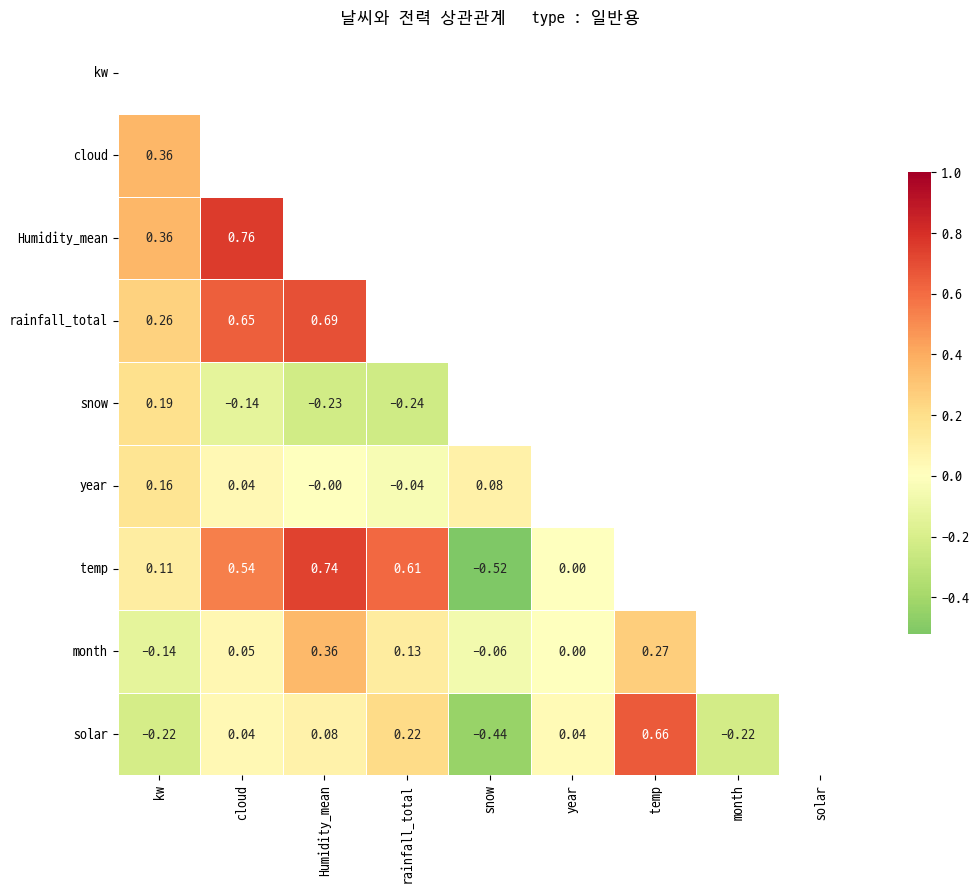

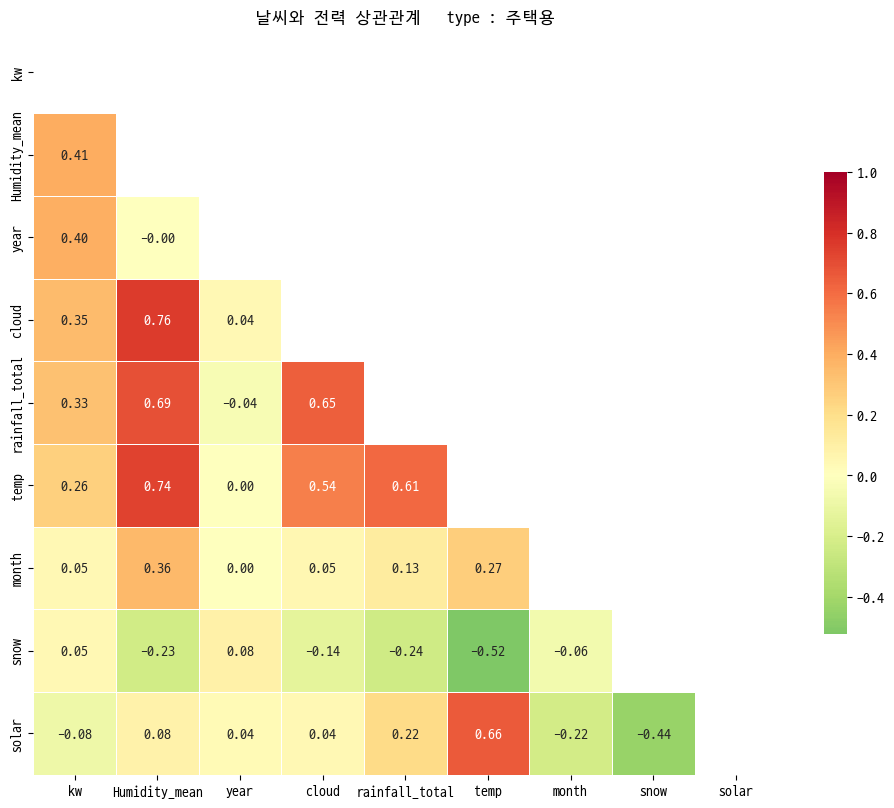

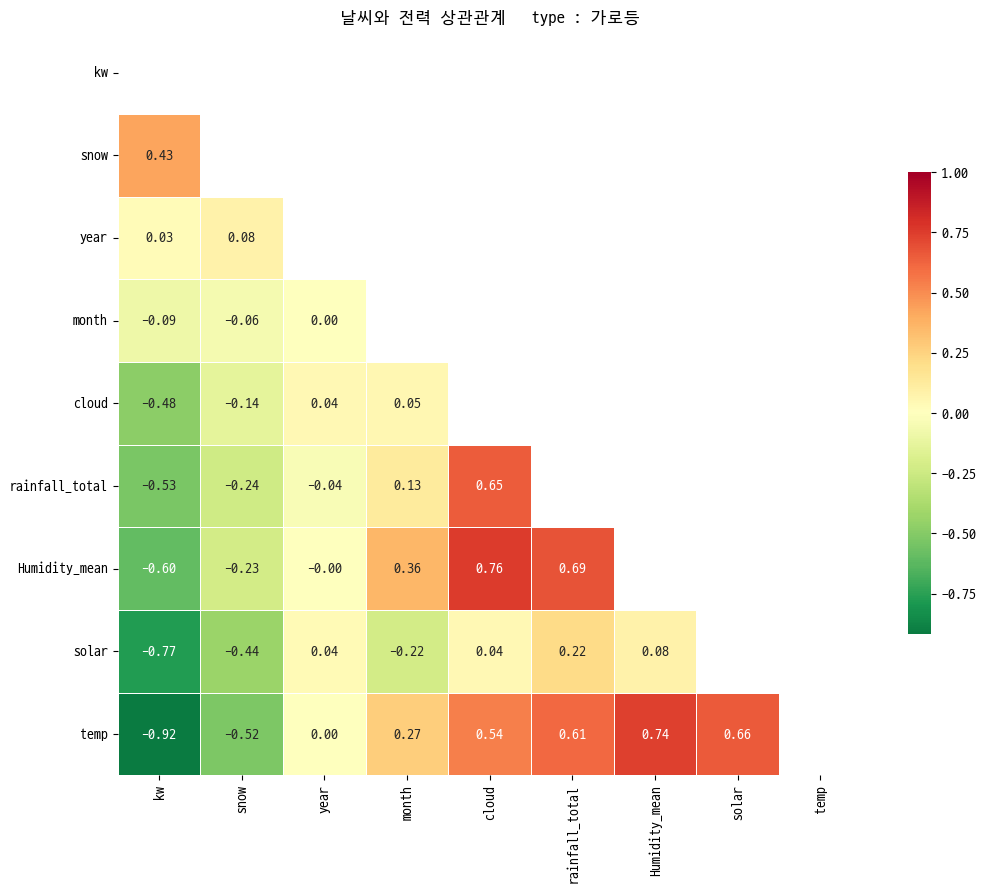

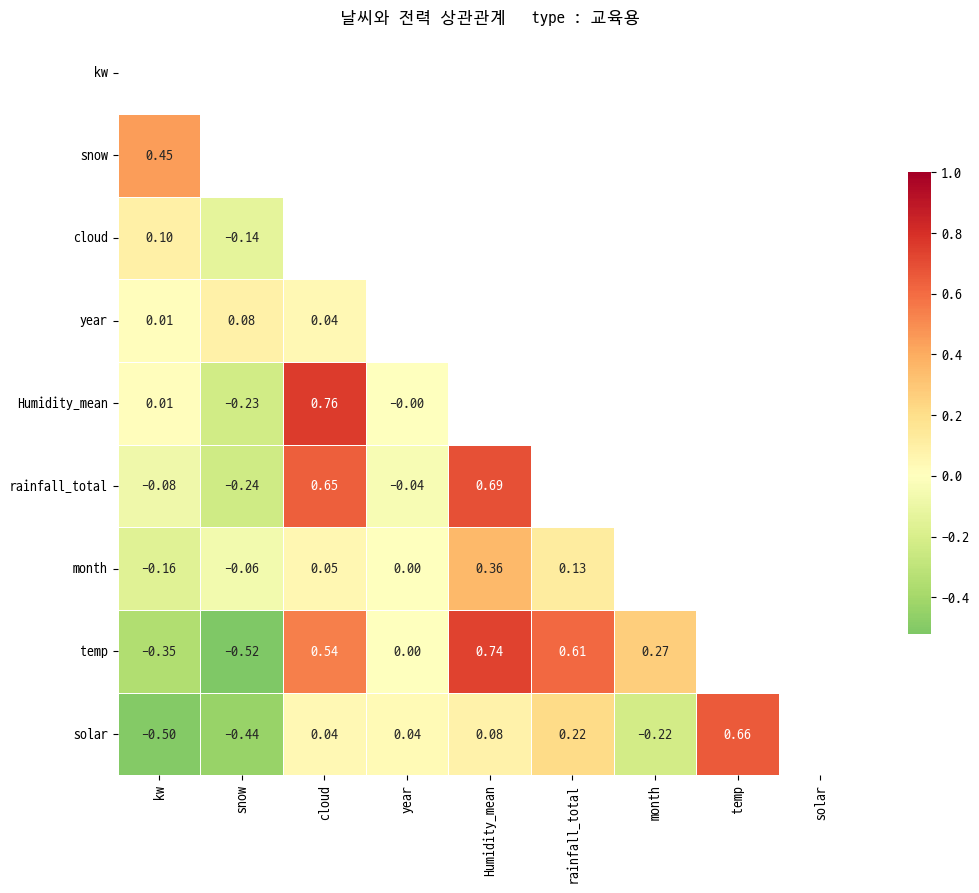

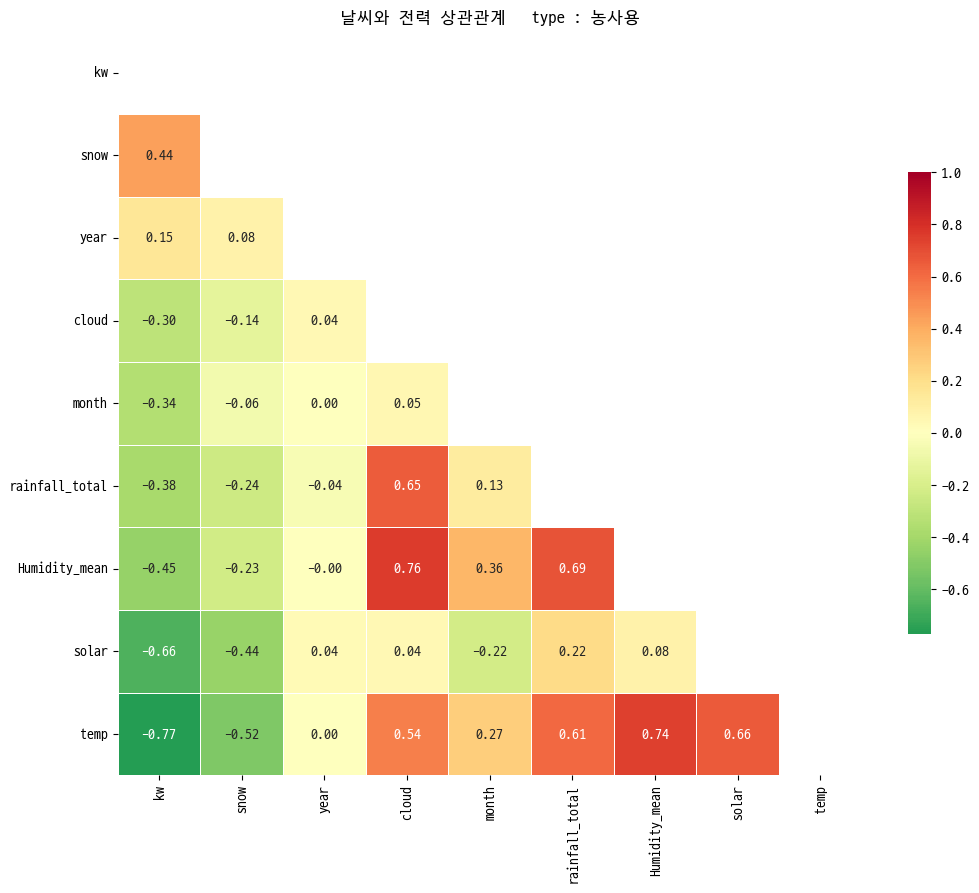

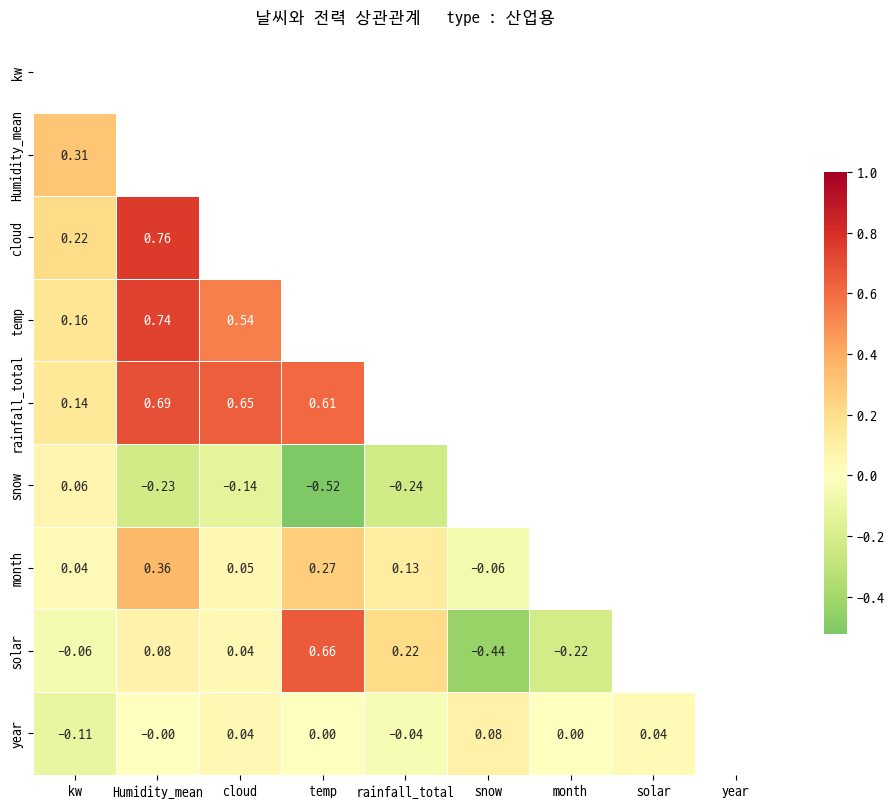

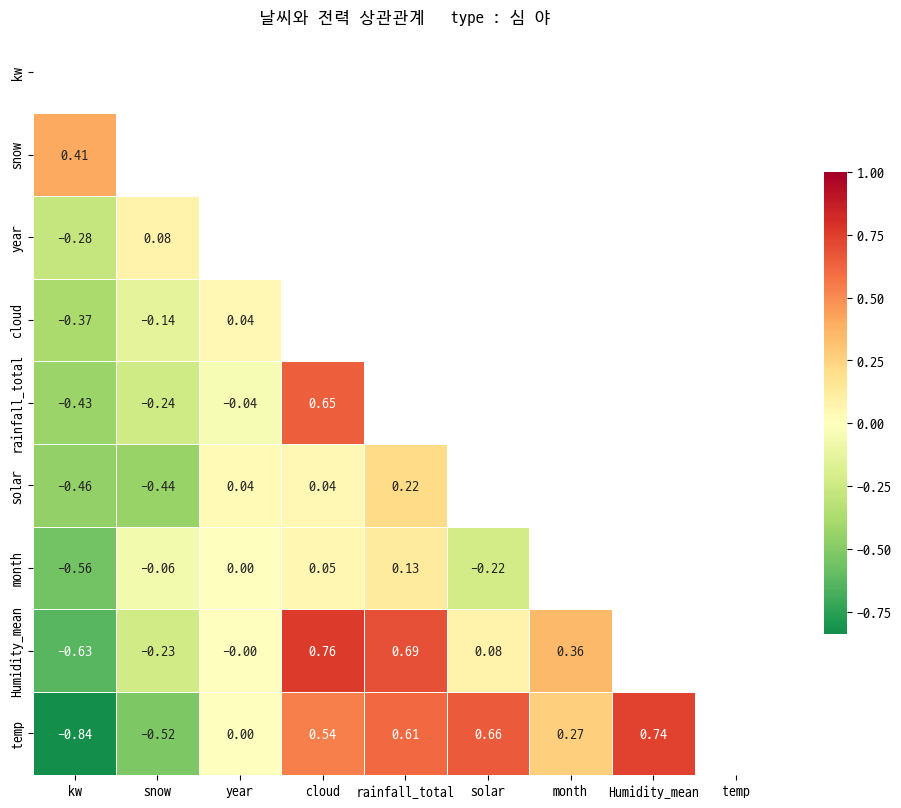

In [368]:
for i, item in enumerate(type_dic):
    num = i + 1
    df_item = item[['year', 'month', 'temp', 'Humidity_mean', 'rainfall_total', 'cloud', 'solar', 'snow','kw']]
    kw_matrix = df_item.corr()
    kw_matrix = kw_matrix.sort_values(by = 'kw', axis = 0, ascending=False)
    kw_matrix = kw_matrix[kw_matrix.index]
    kw_matrix
    # 상관관계의 시각적 표현
    f, ax = plt.subplots(figsize=(12, 12))
    corr = kw_matrix.select_dtypes(exclude=["object","bool"]).corr()

    # 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
    mask = np.zeros_like(kw_matrix, dtype='bool')
    mask[np.triu_indices_from(mask)] = True

    g = sns.heatmap(kw_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
    center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title("날씨와 전력 상관관계   type : " + typename[num])

In [369]:
type1_df.describe()

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,kw
count,84.000000,84.000000,84.0,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,8.400000e+01
mean,2019.000000,6.500000,1.0,14.753571,70.428571,107.540476,5.344048,462.748333,1.809524,2.456018e+08
std,2.012012,3.472786,0.0,8.933320,10.019602,117.916294,1.069777,133.913445,4.945209,3.040792e+07
min,2016.000000,1.000000,1.0,-0.200000,52.000000,0.300000,3.300000,241.720000,0.000000,1.967830e+08
25%,2017.000000,3.750000,1.0,6.875000,62.000000,33.725000,4.600000,343.127500,0.000000,2.203964e+08
50%,2019.000000,6.500000,1.0,15.500000,68.500000,76.850000,5.100000,460.300000,0.000000,2.390395e+08
75%,2021.000000,9.250000,1.0,23.000000,79.000000,131.250000,6.125000,570.310000,0.000000,2.683073e+08
max,2022.000000,12.000000,1.0,28.400000,91.000000,738.100000,8.700000,770.490000,32.900000,3.248466e+08


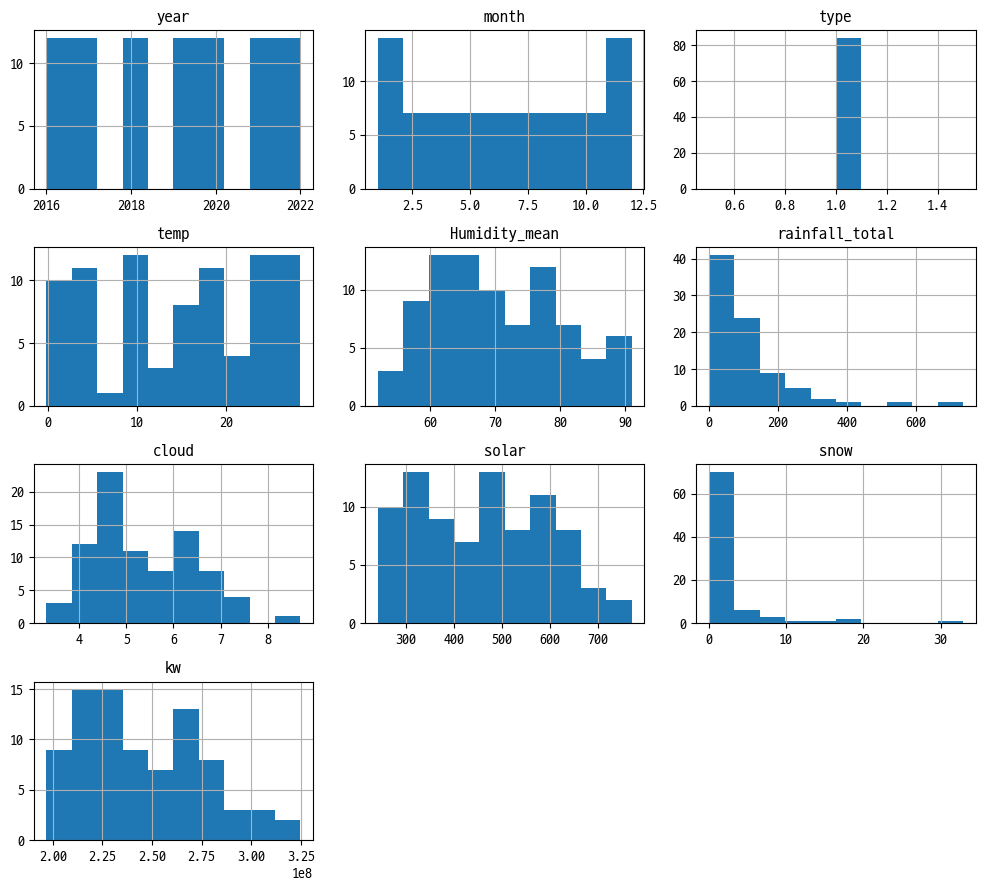

In [370]:
# 데이터 시각화
type1_df.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

In [371]:
type1_df.columns

Index(['year', 'month', 'type', 'temp', 'Humidity_mean', 'rainfall_total',
       'cloud', 'solar', 'snow', 'kw'],
      dtype='object')

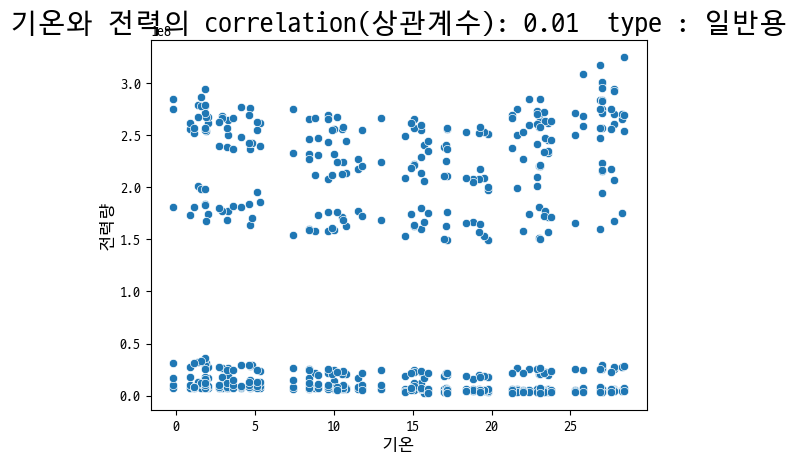

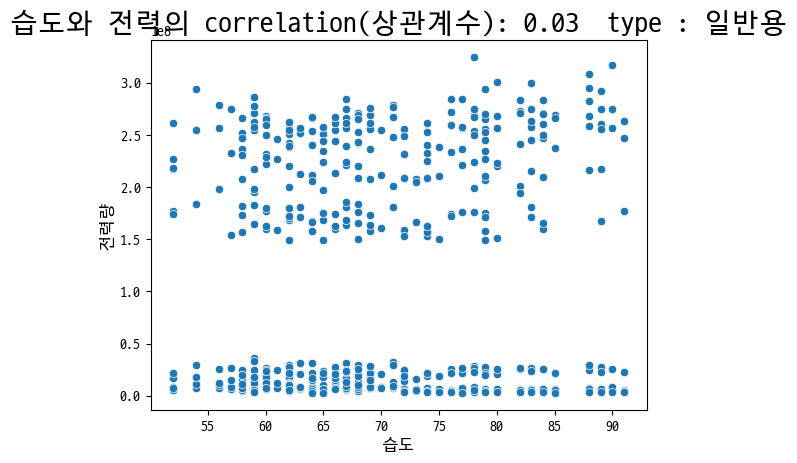

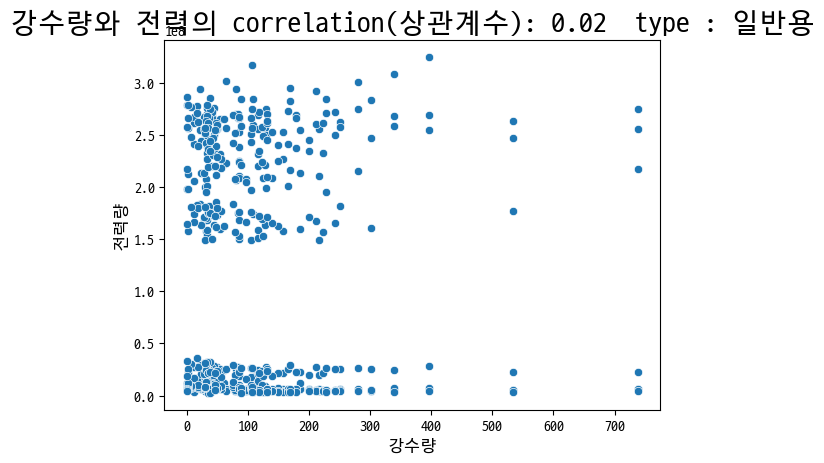

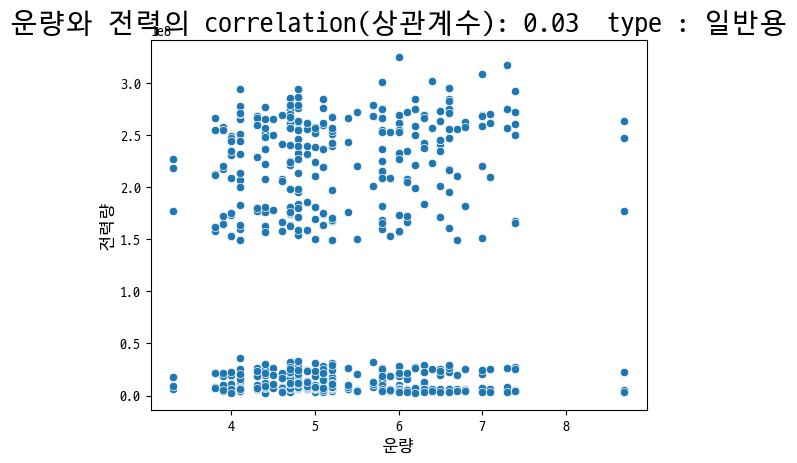

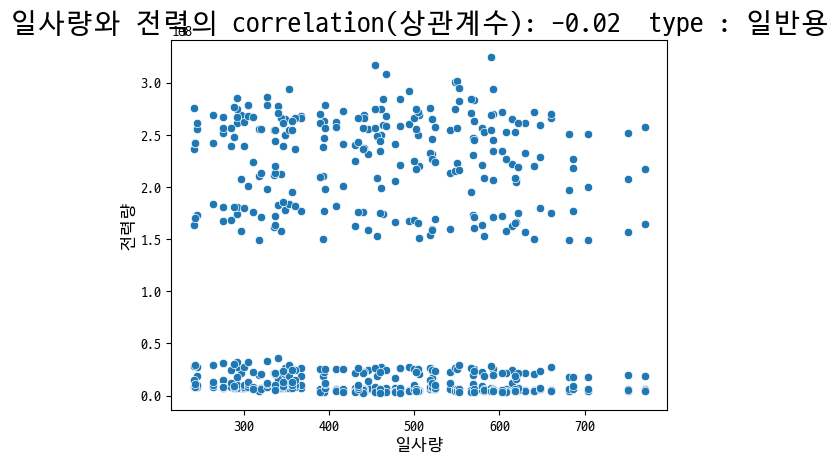

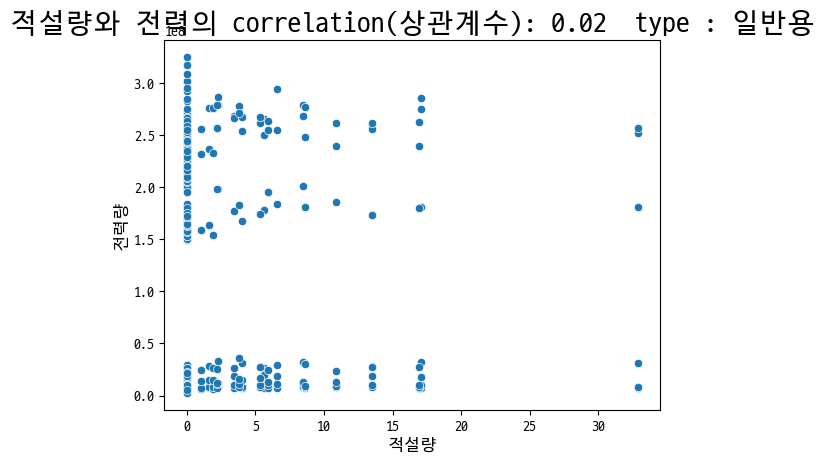

In [372]:
wea_df = ['temp', 'Humidity_mean', 'rainfall_total',
       'cloud', 'solar', 'snow']
wea_dic = {'temp': '기온', 'Humidity_mean' : '습도', 'rainfall_total' : '강수량', 'cloud' : '운량', 'solar' : '일사량', 'snow' : '적설량'}
for item in wea_df:
    correlation = df['kw'].corr(df[item])
    sns.scatterplot(x=df[item], y=df['kw'])
    plt.title(wea_dic[item] + '와 전력의 correlation(상관계수): '+str(np.round(correlation,2)) + "  type : 일반용", fontsize=20)
    plt.xlabel(wea_dic[item] ,fontsize=12)
    plt.ylabel("전력량",fontsize=12)
    plt.show()

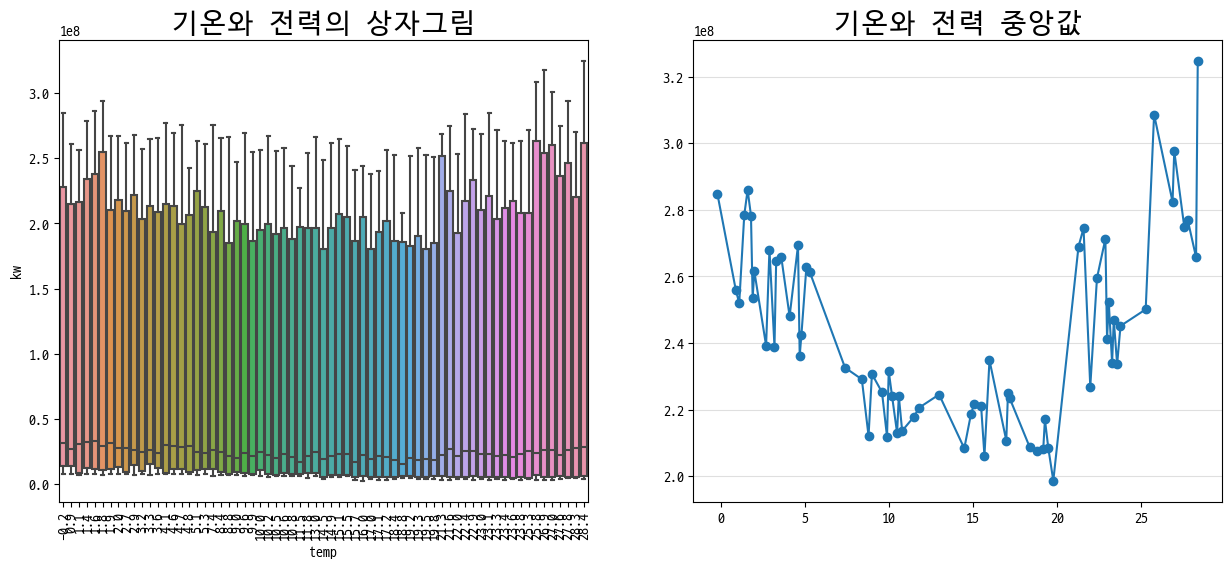

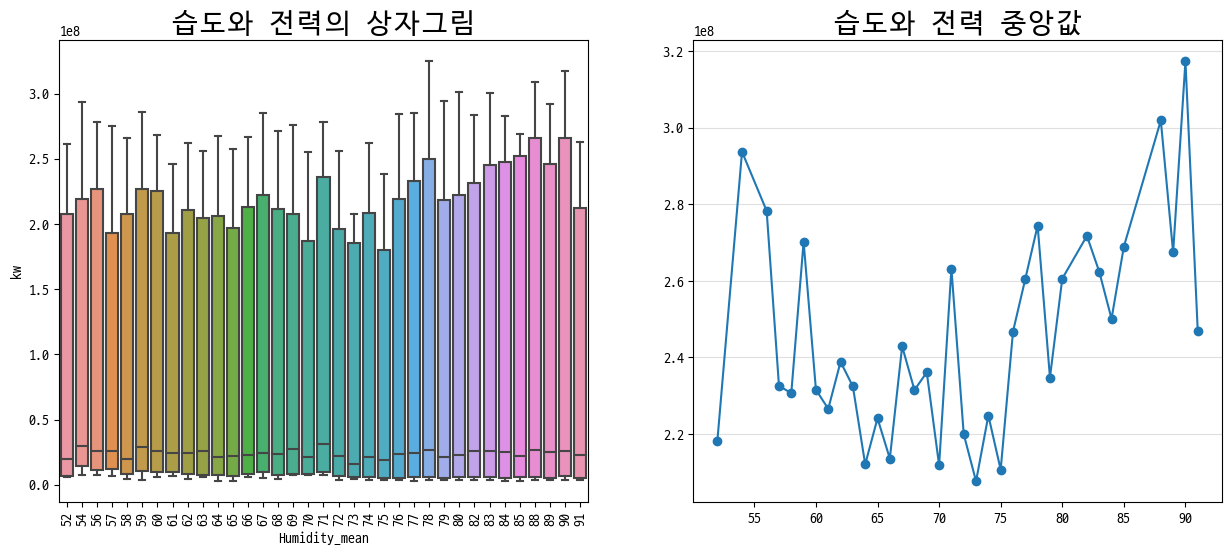

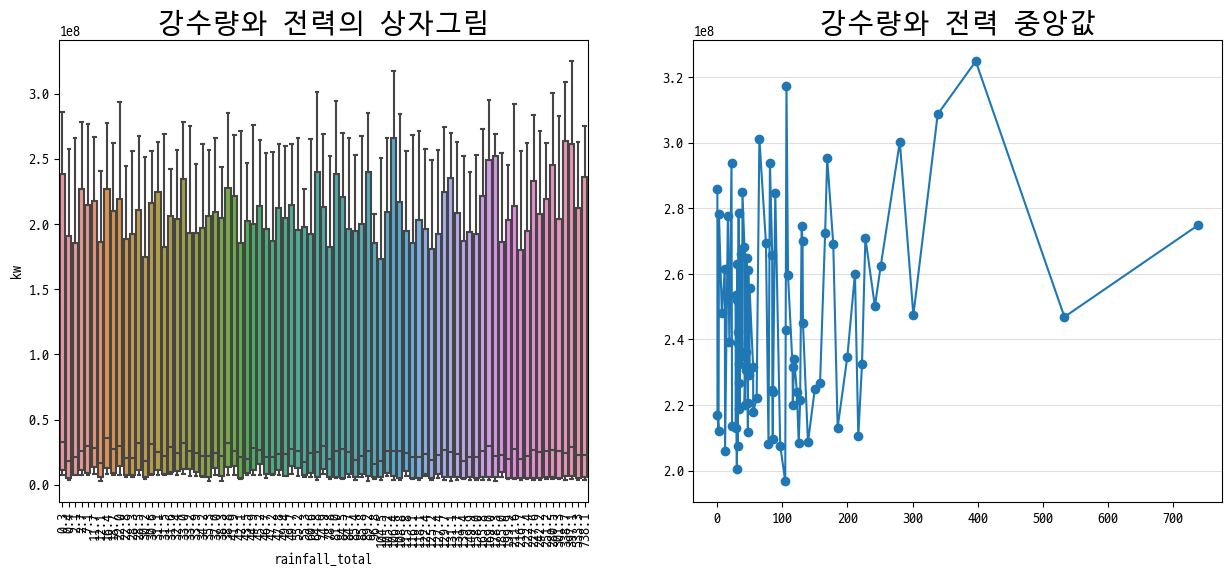

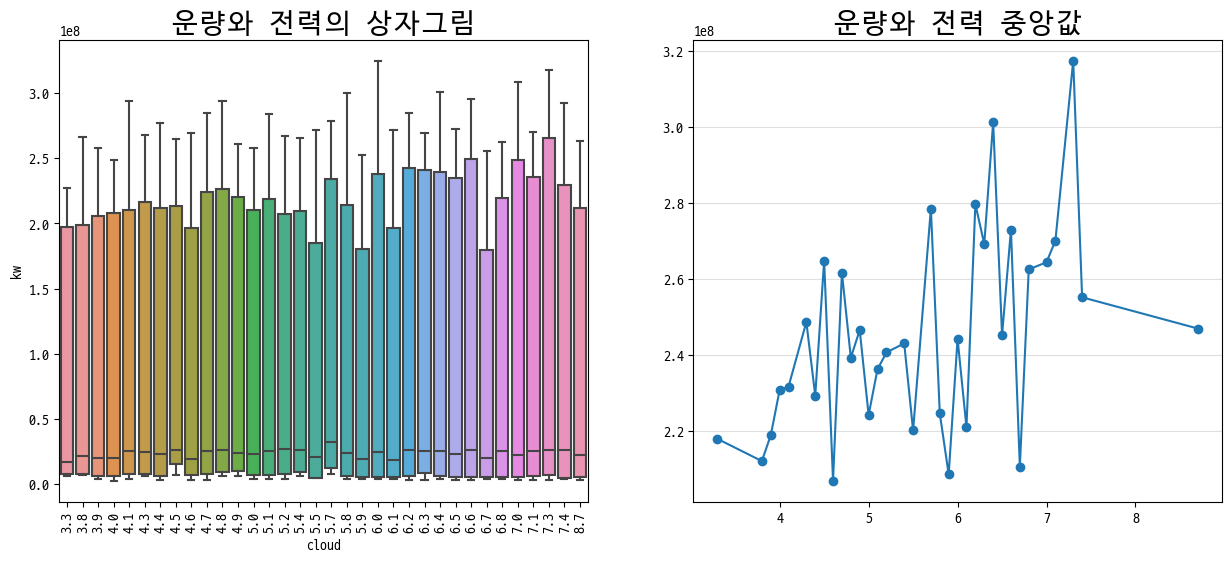

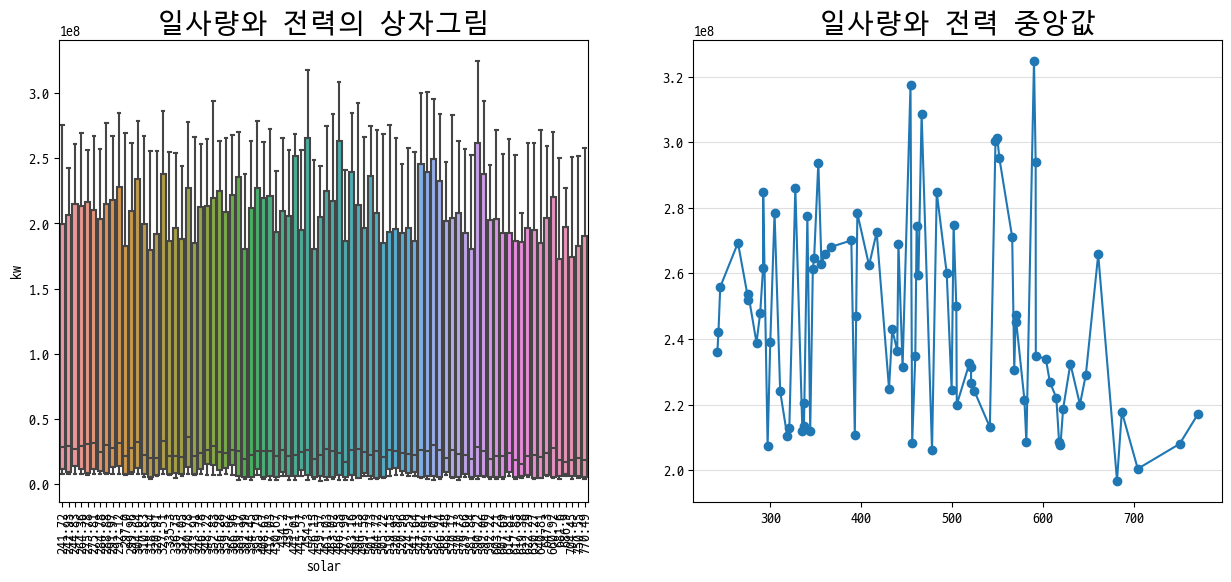

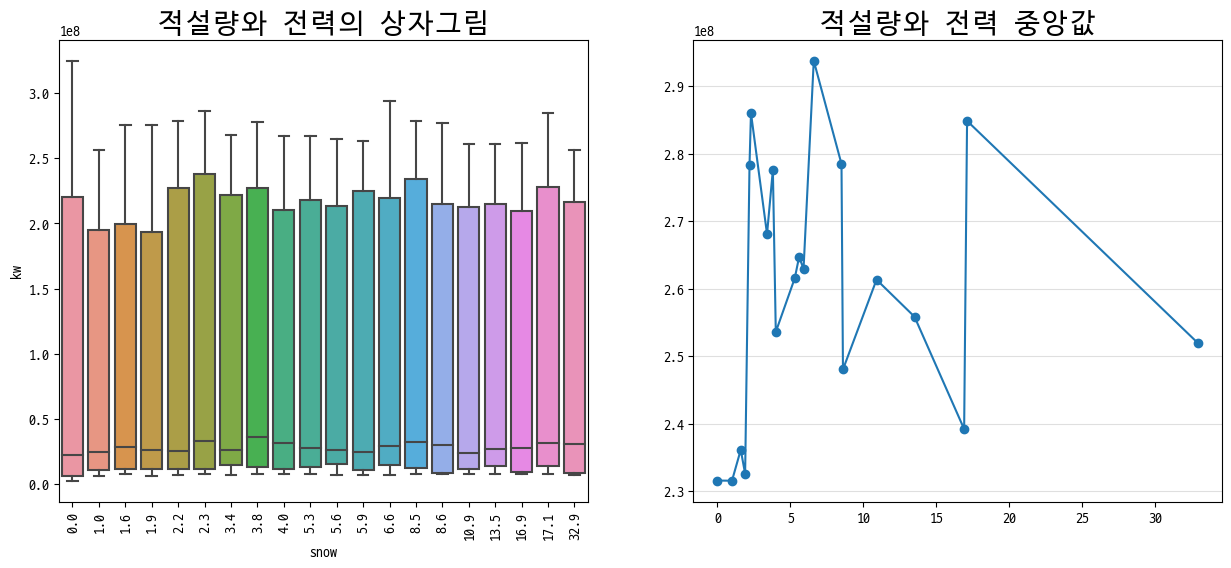

In [373]:
for item in wea_df:
    plt.figure(figsize=(15,6)) # 그래프 크기 조정
    plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
    g = sns.boxplot(x=item, y="kw", data=df, showfliers=False)
    g.set_title(wea_dic[item] + '와 전력의 상자그림', size = 20)
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

    plt.subplot(1,2,2)
    plt.plot(type1_df.groupby(item)['kw'].median(), marker='o')
    plt.grid(axis='y', linestyle='-', alpha=0.4)
    plt.title(wea_dic[item] + '와 전력 중앙값', size = 20)
    plt.show()

In [374]:
from sklearn import linear_model
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [375]:
df = df.fillna(0)

In [376]:
df_corr = df.corr()

In [377]:
df_corr_sort = df_corr.sort_values('kw', ascending=False)
df_corr_sort

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,kw
kw,1.544527e-02,-8.609918e-03,-3.548239e-01,5.038952e-03,2.646979e-02,1.804871e-02,2.564153e-02,-2.007282e-02,1.631955e-02,1.000000
Humidity_mean,-5.976416e-04,3.562942e-01,-4.519488e-17,7.383405e-01,1.000000e+00,6.850695e-01,7.599735e-01,8.197841e-02,-2.283105e-01,0.026470
cloud,4.198165e-02,5.237492e-02,3.178289e-17,5.427388e-01,7.599735e-01,6.482212e-01,1.000000e+00,4.236026e-02,-1.387755e-01,0.025642
rainfall_total,-4.081422e-02,1.257373e-01,1.505194e-17,6.107293e-01,6.850695e-01,1.000000e+00,6.482212e-01,2.153267e-01,-2.398070e-01,0.018049
snow,8.476269e-02,-6.426208e-02,9.833063e-18,-5.215840e-01,-2.283105e-01,-2.398070e-01,-1.387755e-01,-4.370830e-01,1.000000e+00,0.016320
year,1.000000e+00,3.774111e-14,2.305034e-15,1.273597e-03,-5.976416e-04,-4.081422e-02,4.198165e-02,3.681638e-02,8.476269e-02,0.015445
temp,1.273597e-03,2.674031e-01,-3.129885e-17,1.000000e+00,7.383405e-01,6.107293e-01,5.427388e-01,6.603860e-01,-5.215840e-01,0.005039
month,3.774111e-14,1.000000e+00,7.526169e-17,2.674031e-01,3.562942e-01,1.257373e-01,5.237492e-02,-2.196398e-01,-6.426208e-02,-0.008610
solar,3.681638e-02,-2.196398e-01,-4.720550e-17,6.603860e-01,8.197841e-02,2.153267e-01,4.236026e-02,1.000000e+00,-4.370830e-01,-0.020073
type,2.305034e-15,7.526169e-17,1.000000e+00,-3.129885e-17,-4.519488e-17,1.505194e-17,3.178289e-17,-4.720550e-17,9.833063e-18,-0.354824


In [410]:
cols_train = ['year','month','type','temp', 'Humidity_mean', 'rainfall_total',
       'cloud', 'solar', 'snow']
x_train_pre = df[cols_train]
y = df['kw'].values

In [411]:
X_train, X_test, y_train, y_test = train_test_split(x_train_pre, y, test_size=0.2)

In [412]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [413]:
model = Sequential()
model.add(Dense(10, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                100       
                                                                 
 dense_37 (Dense)            (None, 30)                330       
                                                                 
 dense_38 (Dense)            (None, 40)                1240      
                                                                 
 dense_39 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,711
Trainable params: 1,711
Non-trainable params: 0
_________________________________________________________________


In [414]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [415]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=30)

In [416]:
modelpath = 'kw_weather.hdf5'

In [417]:
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0, save_best_only = True)

In [418]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs = 4000, batch_size=32,
                    callbacks = [early_stopping_callback, checkpointer])

Epoch 1/4000
11/11 [==============================] - 1s 24ms/step - loss: 23406650492715008.0000 - val_loss: 22499420255813632.0000
Epoch 2/4000
11/11 [==============================] - 0s 7ms/step - loss: 23406607543042048.0000 - val_loss: 22499381601107968.0000
Epoch 3/4000
11/11 [==============================] - 0s 7ms/step - loss: 23406560298401792.0000 - val_loss: 22499330061500416.0000
Epoch 4/4000
11/11 [==============================] - 0s 6ms/step - loss: 23406495873892352.0000 - val_loss: 22499252752089088.0000
Epoch 5/4000
11/11 [==============================] - 0s 6ms/step - loss: 23406401384611840.0000 - val_loss: 22499138935455744.0000
Epoch 6/4000
11/11 [==============================] - 0s 6ms/step - loss: 23406257503207424.0000 - val_loss: 22498971431731200.0000
Epoch 7/4000
11/11 [==============================] - 0s 7ms/step - loss: 23406055639744512.0000 - val_loss: 22498739503497216.0000
Epoch 8/4000
11/11 [==============================] - 0s 7ms/step - loss: 2

In [419]:
real_kw = []
pred_kw = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제kw: {:.2f}, 예상kw: {:.2f}".format(real, prediction))
    real_kw.append(real)
    pred_kw.append(prediction)
    n_iter += 1
    X_num.append(n_iter)

4/4 [==============================] - 0s 2ms/step
실제kw: 163547359.00, 예상kw: 94329856.00
실제kw: 9553616.00, 예상kw: 98091768.00
실제kw: 278313685.00, 예상kw: 97436400.00
실제kw: 4641490.00, 예상kw: 109414928.00
실제kw: 10709646.00, 예상kw: 97534552.00
실제kw: 5393415.00, 예상kw: 110052400.00
실제kw: 236352904.00, 예상kw: 101331104.00
실제kw: 204748067.00, 예상kw: 109091536.00
실제kw: 24306352.00, 예상kw: 97372296.00
실제kw: 5259680.00, 예상kw: 109365856.00
실제kw: 171055535.00, 예상kw: 111761496.00
실제kw: 7934865.00, 예상kw: 94403472.00
실제kw: 254699750.00, 예상kw: 108717024.00
실제kw: 282528446.00, 예상kw: 110126024.00
실제kw: 4037883.00, 예상kw: 107443072.00
실제kw: 6058362.00, 예상kw: 110138608.00
실제kw: 200924825.00, 예상kw: 96118960.00
실제kw: 7990336.00, 예상kw: 93845280.00
실제kw: 6194104.00, 예상kw: 126289536.00
실제kw: 181421875.00, 예상kw: 97323232.00
실제kw: 11105339.00, 예상kw: 95281936.00
실제kw: 180878499.00, 예상kw: 95840312.00
실제kw: 21471834.00, 예상kw: 97684896.00
실제kw: 21371394.00, 예상kw: 109516368.00
실제kw: 6233652.00, 예상kw: 106336960.00


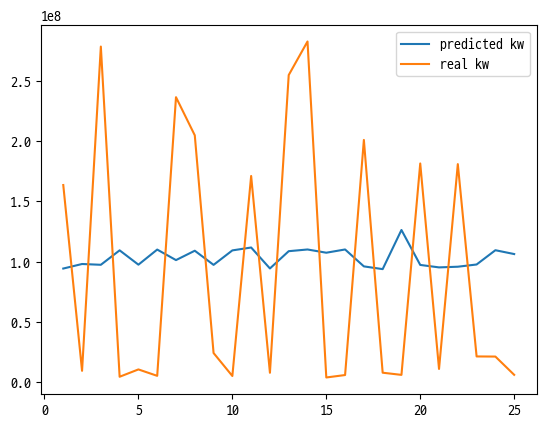

In [420]:
plt.plot(X_num, pred_kw, label='predicted kw')
plt.plot(X_num, real_kw, label='real kw')
plt.legend()
plt.show()

In [439]:
from sklearn.preprocessing import PolynomialFeatures

In [440]:
cols_train = ['year','month','type','temp', 'Humidity_mean', 'rainfall_total',
       'cloud', 'solar', 'snow']
x_train_pre = df[cols_train]
y = df['kw'].values

In [441]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(x_train_pre, y, test_size=0.2, random_state=42)

In [442]:
# 모델 선택 및 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [443]:
# 모델 평가
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.0857973230830504e+16


In [444]:
df.head(1)

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,kw
5,2016,1,1,0.9,69,49.7,6.0,244.83,13.5,255851378


In [445]:
nwe_df = df.head(1).drop(columns = ['kw'])

In [447]:

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.14117663299690186
0.00487795927826884


Linear model = Mean Squared Error: 1.0857973230830504e+16

In [448]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly = poly.transform(X_test)
print(train_poly.shape)

(470, 2001)


In [451]:
lr.fit(train_poly, y_train)

LinearRegression()

In [452]:
print(lr.score(test_poly, y_test))

-0.6941457178747532


In [453]:
df

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,kw
5,2016,1,1,0.9,69,49.7,6.0,244.83,13.5,255851378
6,2016,1,2,0.9,69,49.7,6.0,244.83,13.5,173309722
0,2016,1,3,0.9,69,49.7,6.0,244.83,13.5,7842078
1,2016,1,4,0.9,69,49.7,6.0,244.83,13.5,27092538
2,2016,1,5,0.9,69,49.7,6.0,244.83,13.5,9785066
...,...,...,...,...,...,...,...,...,...,...
581,2022,12,3,1.1,63,30.6,5.0,275.78,32.9,7316937
582,2022,12,4,1.1,63,30.6,5.0,275.78,32.9,31159967
583,2022,12,5,1.1,63,30.6,5.0,275.78,32.9,8624110
584,2022,12,6,1.1,63,30.6,5.0,275.78,32.9,256259483


In [455]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [456]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))

0.6902470014493902


In [457]:
print(ridge.score(test_scaled, y_test))

0.16741988428811105
